In [64]:
!pip install shap

In [65]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

In [66]:
import io

In [67]:
from google.colab import files
uploaded = files.upload()

Saving HD.csv to HD.csv


In [69]:
df= pd.read_csv(io.BytesIO(uploaded['HD.csv']))
print(df)

           Date        Open        High         Low       Close   Adj Close  \
0      1/4/2010   29.150000   29.150000   28.549999   28.670000   20.551073   
1      1/5/2010   28.730000   28.990000   28.290001   28.879999   20.701614   
2      1/6/2010   28.879999   29.000000   28.700001   28.780001   20.629927   
3      1/7/2010   28.860001   29.219999   28.730000   29.120001   20.873646   
4      1/8/2010   29.000000   29.240000   28.690001   28.980000   20.773291   
...         ...         ...         ...         ...         ...         ...   
2635  6/23/2020  253.000000  253.440002  250.130005  250.309998  230.219467   
2636  6/24/2020  247.809998  250.289993  242.729996  246.130005  226.374954   
2637  6/25/2020  244.800003  246.350006  242.199997  245.380005  225.685181   
2638  6/26/2020  245.350006  246.100006  240.250000  241.009995  221.665909   
2639  6/29/2020  242.660004  246.500000  240.339996  246.119995  226.365753   

         Average  
0      27.214214  
1      27.118

In [70]:
df = df.drop(['Date'], axis = 1)
df.head()

,Open,High,Low,Close,Adj Close,Average
0,29.150000,29.150000,28.549999,28.670000,20.551073,27.214214
1,28.730000,28.990000,28.290001,28.879999,20.701614,27.118323
2,28.879999,29.000000,28.700001,28.780001,20.629927,27.197986
3,28.860001,29.219999,28.730000,29.120001,20.873646,27.360729
4,29.000000,29.240000,28.690001,28.980000,20.773291,27.336658


In [71]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

x = df.drop("Average", axis = 1)
y = df.Close
y = y.astype('int')

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 1)

In [73]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

In [74]:
y_pred = clf.predict(x_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

          27       1.00      1.00      1.00         2
          28       1.00      0.50      0.67         2
          29       0.75      1.00      0.86         3
          30       1.00      1.00      1.00         4
          31       1.00      1.00      1.00        11
          32       1.00      1.00      1.00         6
          33       1.00      1.00      1.00         6
          34       1.00      1.00      1.00         6
          35       1.00      0.83      0.91         6
          36       0.83      1.00      0.91         5
          37       1.00      1.00      1.00        11
          38       1.00      1.00      1.00         2
          39       0.00      0.00      0.00         1
          40       0.50      1.00      0.67         1
          41       1.00      1.00      1.00         1
          42       1.00      1.00      1.00         1
          44       1.00      1.00      1.00         2
          45       1.00    

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


In [75]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(random_state=0)

In [76]:
y_pred = classifier.predict(x_test)

In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


0.03535353535353535

In [78]:
clearer = shap.Explainer(clf)
shap_values = clearer.shap_values(x_test)

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.


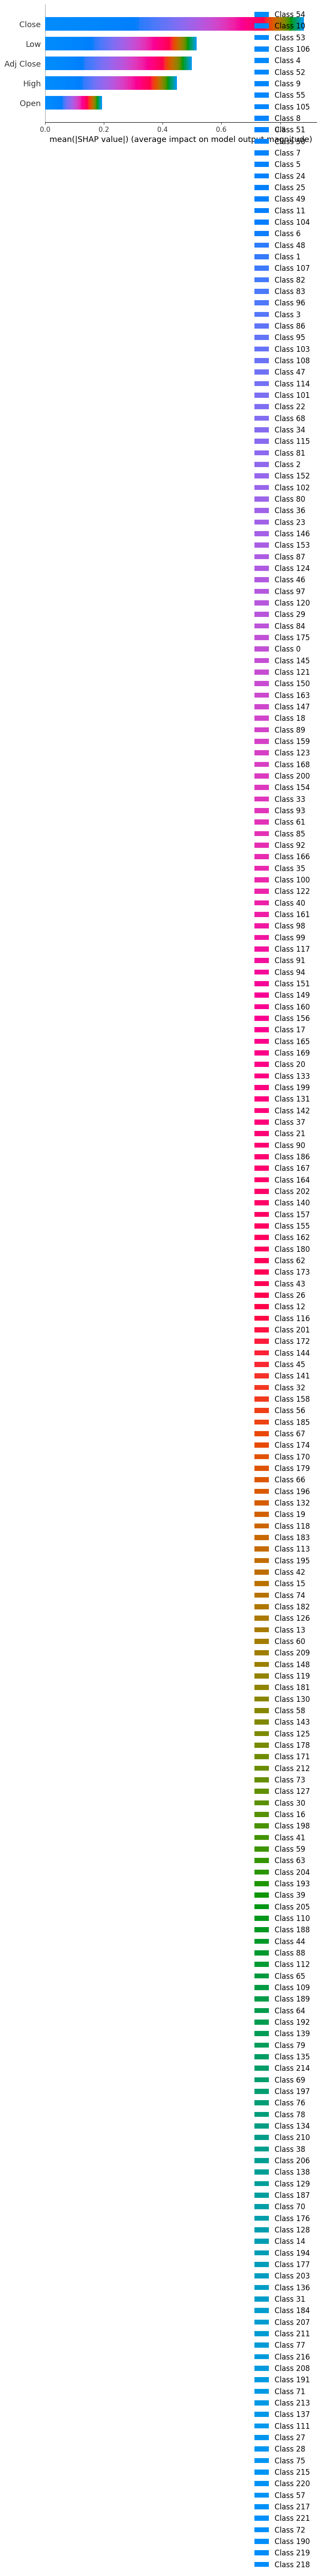

In [79]:
shap.summary_plot(shap_values, x_test)